In [190]:
!pip install scikit-learn

In [191]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sn

In [192]:
X = [[10000], [20000], [15000], [30000]]
y = [0, 1, 0, 1]

model = LogisticRegression()
model.fit(X, y)

print(model.predict([[50000]]))

[1]


In [193]:
df=pd.read_csv("Loan dataset_classification.csv")
df.info()
df.columns
df.describe()
df.shape
print(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    str    
 1   Gender             957 non-null    str    
 2   Married            978 non-null    str    
 3   Dependents         956 non-null    str    
 4   Education          981 non-null    str    
 5   Self_Employed      926 non-null    str    
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    str    
 12  Loan_Status        614 non-null    str    
dtypes: float64(4), int64(1), str(8)
memory usage: 99.8 KB
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate       

In [194]:
print(df.isnull().sum())

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


In [195]:
import matplotlib.pyplot as plt

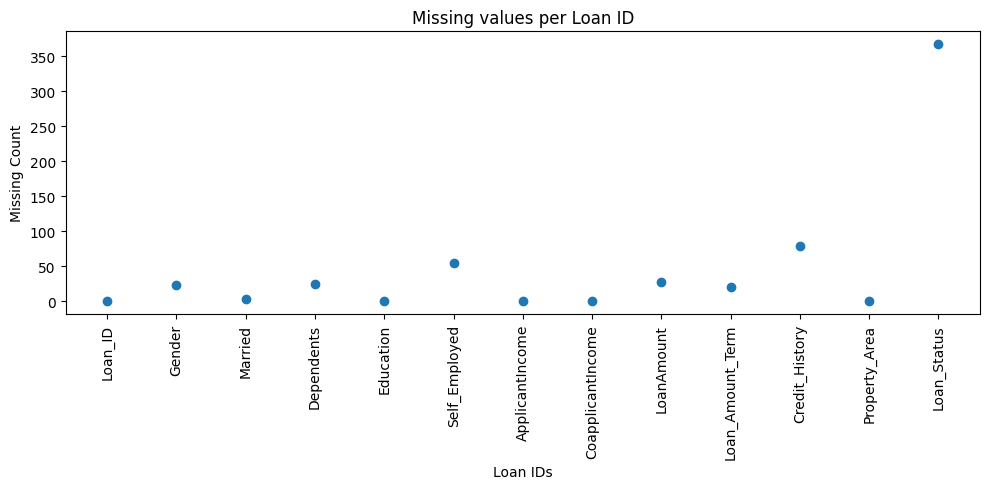

In [196]:
arr = df.isnull().sum()

plt.figure(figsize=(10, 5))
plt.scatter(range(len(arr)), arr.values)
plt.xticks(range(len(arr)), arr.index, rotation=90)
plt.xlabel("Loan IDs")
plt.ylabel("Missing Count")
plt.title("Missing values per Loan ID")
plt.tight_layout()
plt.show()


In [197]:
import seaborn as sns

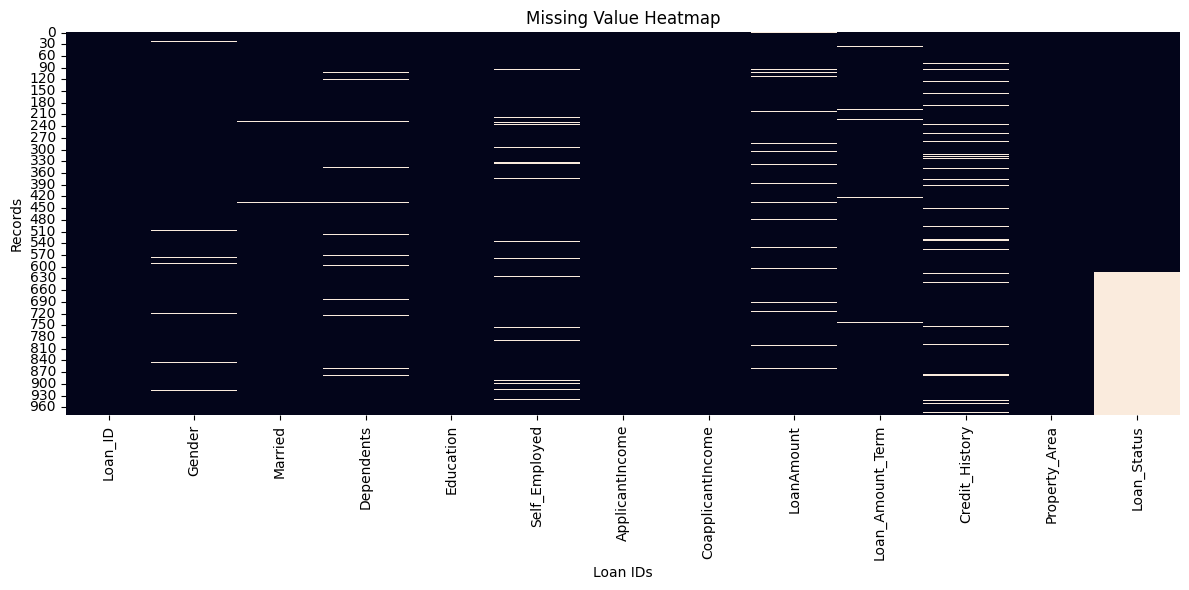

In [198]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)

plt.xlabel("Loan IDs")
plt.ylabel("Records")
plt.title("Missing Value Heatmap")
plt.tight_layout()
plt.show()


In [199]:
print(df["Married"].mode())

0    Yes
Name: Married, dtype: str


In [200]:
df1 = df
df1["Married"] = df1["Married"].fillna(df1["Married"].mode()[0])
print(df1["Married"].isnull().sum())


0


<Axes: xlabel='Loan_Status'>

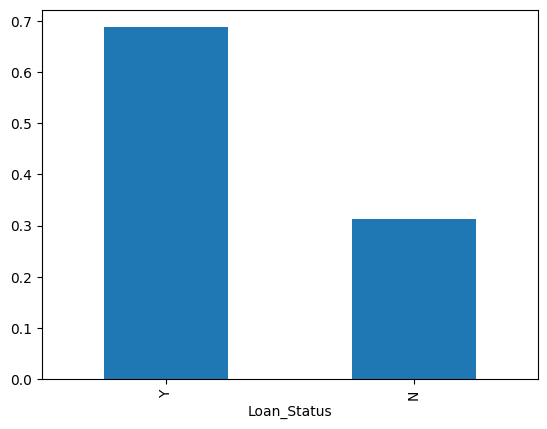

In [201]:
df["Loan_Status"].value_counts()
df["Loan_Status"].value_counts(normalize=True)*100
df["Loan_Status"].value_counts(normalize=True).plot.bar()

<Axes: >

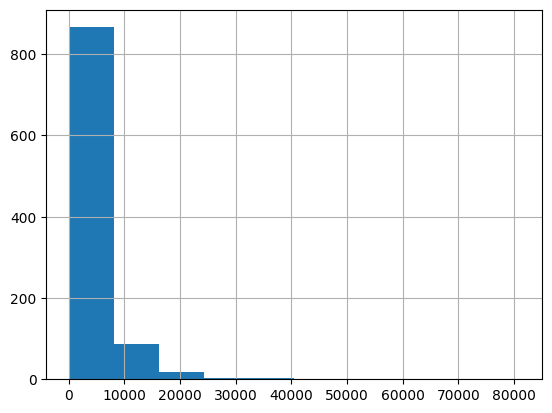

In [202]:
df["ApplicantIncome"].hist()

<Axes: >

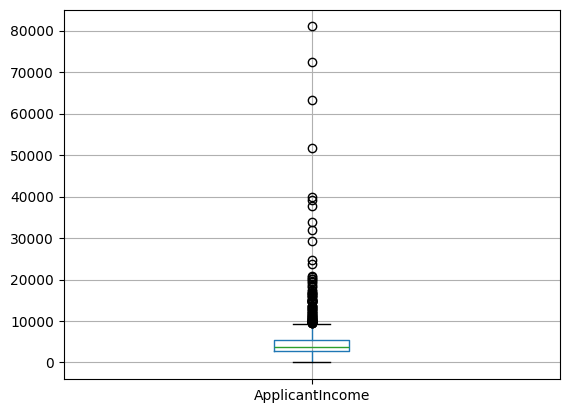

In [203]:
df.boxplot(column="ApplicantIncome")

<Axes: >

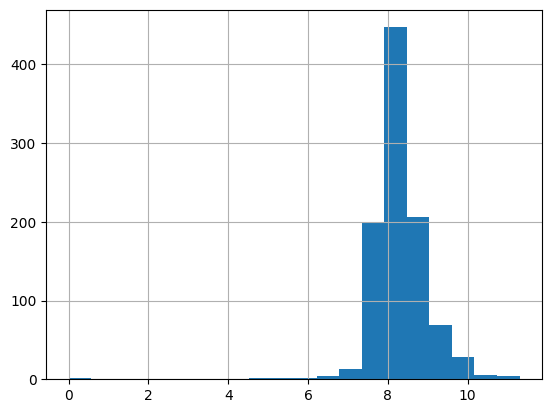

In [204]:
df["ApplicantIncome_log"]=np.log(df["ApplicantIncome"]+1)
df["ApplicantIncome_log"].hist(bins=20)

<Axes: >

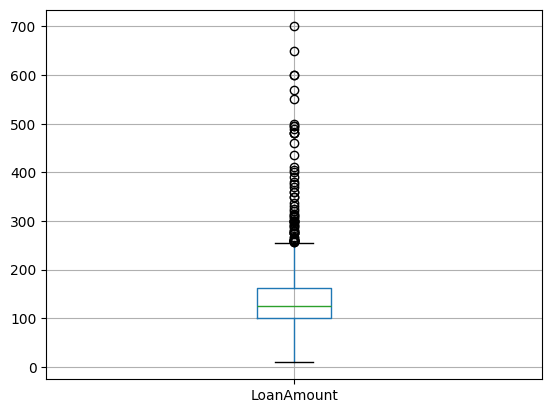

In [205]:
df.boxplot(column="LoanAmount")

<Axes: >

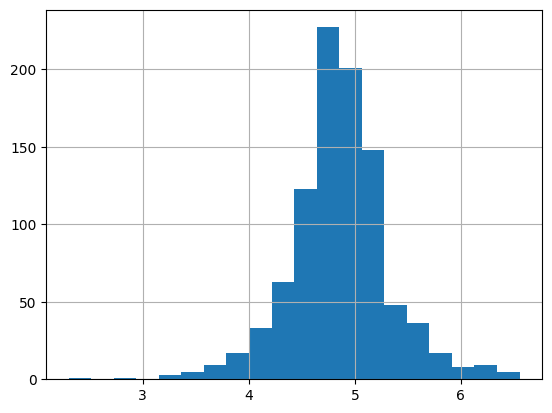

In [206]:
df["LoanAmount_log"]=np.log(df["LoanAmount"]+1)
df["LoanAmount_log"].hist(bins=20)

<Axes: >

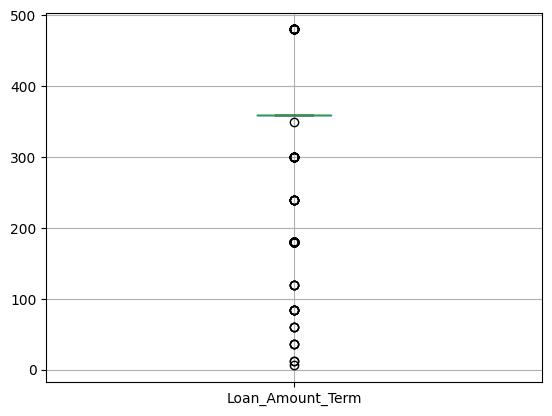

In [207]:
df.boxplot(column="Loan_Amount_Term")

<Axes: >

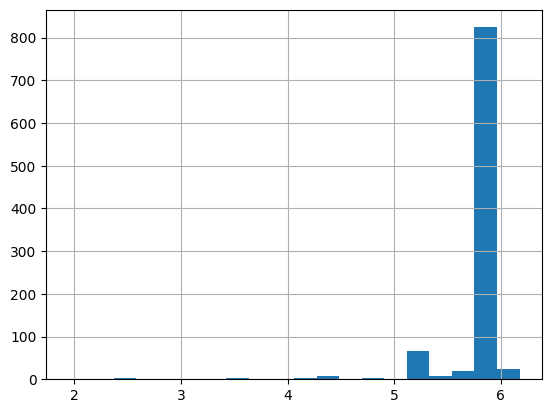

In [208]:
df["Loan_Amount_Term_log"]=np.log(df["Loan_Amount_Term"]+1)
df["Loan_Amount_Term_log"].hist(bins=20)

In [209]:
pd.crosstab([df["Married"], df["Credit_History"]], df["Loan_Status"])

Loan_Status              N    Y
Married Credit_History         
No      0.0             29    3
        1.0             45  122
Yes     0.0             53    4
        1.0             52  256

<Axes: xlabel='Married', ylabel='count'>

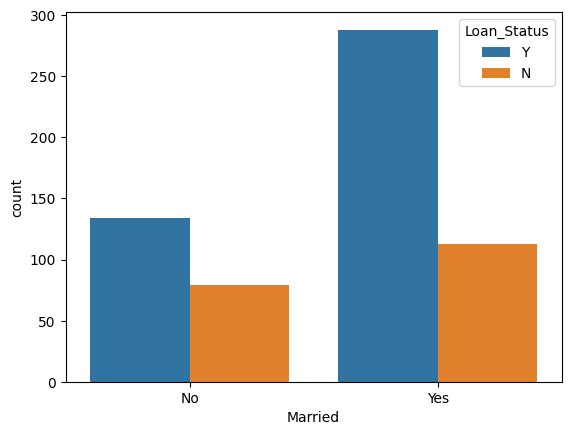

In [210]:
sns.countplot(x="Married", hue="Loan_Status", data=df)

In [211]:
pd.crosstab(df["Credit_History"], df["Loan_Status"], normalize="index")*100

Loan_Status,N,Y
Credit_History,,
0.0,92.134831,7.865169
1.0,20.421053,79.578947


In [212]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

In [213]:
print(df.isnull().sum())

Loan_ID                   0
Gender                   24
Married                   0
Dependents                0
Education                 0
Self_Employed            55
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               27
Loan_Amount_Term         20
Credit_History           79
Property_Area             0
Loan_Status             367
ApplicantIncome_log       0
LoanAmount_log           27
Loan_Amount_Term_log     20
dtype: int64


In [214]:
df_try = df.copy()

# Features (all columns except target)
print(df["Married"].unique())
df["Married"]=df["Married"].fillna(df["Married"].mode())
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
print(df["Married"].unique())


print(df["Self_Employed"].unique())
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].map({"No": 0, "Yes": 1})
print(df["Self_Employed"].unique())

print(df["Education"].unique())
df["Education"]=df["Education"].fillna(df["Education"].mode())
df["Education"] = df["Education"].map({"Not Graduate": 0, "Graduate": 1})
print(df["Education"].unique())

print(df["Property_Area"].unique())
df["Property_Area"]=df["Property_Area"].fillna(df["Property_Area"].mode())
df["Property_Area"] = df["Property_Area"].map({"Urban": 0, "Rural": 1,"Semiurban":2 })
print(df["Property_Area"].unique())

df.fillna({"ApplicantIncome":np.median(df["ApplicantIncome"])})
df.fillna({"CoapplicantIncome":np.median(df["CoapplicantIncome"])},inplace=True)
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(0)
df["ApplicantIncome_log"]= np.log(df["ApplicantIncome"])
df["CoApplicantIncome_log"]= np.log(df["CoapplicantIncome"])

df.isnull().sum()

# Numeric columns → median
# for col in df_try.select_dtypes(include=["int64", "float64"]).columns:
#     if col == "Credit_History":
#         df_try[col] = df_try[col].fillna(0)
#     else:
#         df_try[col] = df_try[col].fillna(df_try[col].median())

# # Non-numeric columns → mode
# for col in df_try.select_dtypes(exclude=["int64", "float64"]).columns:
#     if col != "Loan_Status":
#         df_try[col] = df_try[col].fillna(df_try[col].mode().iloc[0])

<StringArray>
['No', 'Yes']
Length: 2, dtype: str
[0 1]
<StringArray>
['No', 'Yes', nan]
Length: 3, dtype: str
[0 1]
<StringArray>
['Graduate', 'Not Graduate']
Length: 2, dtype: str
[1 0]
<StringArray>
['Urban', 'Rural', 'Semiurban']
Length: 3, dtype: str
[0 1 2]


c:\Users\thriam\WorkSpaces\mercml\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loan_ID                    0
Gender                    24
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
LoanAmount_log            27
Loan_Amount_Term_log      20
CoApplicantIncome_log      0
dtype: int64

In [216]:
train_df=df[df["Loan_Status"].notna()]
test_df= df[df["Loan_Status"].isna()]

print(train_df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log',
       'CoApplicantIncome_log'],
      dtype='str')


In [223]:
X = train_df[[
    'Education',
    'Self_Employed',
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History',
    'Property_Area',
    'ApplicantIncome_log'
]]
 
y = train_df[['Loan_Status']]
 
model = LogisticRegression(max_iter=1000)
 
model.fit(X, y)

c:\Users\thriam\WorkSpaces\mercml\.venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [225]:
p1 = [1, 0, 126.0, 360, 1, 0, 8.6]
print(model.predict([p1]))

['Y']


c:\Users\thriam\WorkSpaces\mercml\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [226]:
from sklearn.metrics import confusion_matrix, classification_report

In [229]:
y_pred = model.predict([p1])

print("Confusion Matrix:\n", confusion_matrix(['Y'], y_pred))
print("\nClassification Report:\n", classification_report(['Y'], y_pred))

Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

           Y       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



c:\Users\thriam\WorkSpaces\mercml\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\thriam\WorkSpaces\mercml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
Extra

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [ ]:
# 1. Copy dataframe

df_clean = dff.copy()


# 2. Clean values like "3+" → 3

for col in df_clean.select_dtypes(include="object").columns:
    df_clean[col] = df_clean[col].str.replace("+", "", regex=False)


# 3. Encode categorical columns

label_encoders = {}

for col in df_clean.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le

# 4. Model-based imputation
#    (regression-style, works for both num & cat)

imputer = IterativeImputer(
    estimator=BayesianRidge(),  # stable + fast
    max_iter=10,
    random_state=42
)

df_imputed = pd.DataFrame(
    imputer.fit_transform(df_clean),
    columns=df_clean.columns
)

# 5. Decode categorical columns back
for col, le in label_encoders.items():
    df_imputed[col] = le.inverse_transform(df_imputed[col].round().astype(int))



C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_7336\3099902016.py:8: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df_clean.select_dtypes(include="object").columns:
C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_7336\3099902016.py:16: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.py

In [ ]:
df_new = df_imputed.copy()

# Numeric columns → median
for col in df_new.select_dtypes(include=["int64", "float64"]).columns:
    df_new[col] = df_new[col].fillna(df_new[col].median())

# Non-numeric columns → mode
for col in df_new.select_dtypes(exclude=["int64", "float64"]).columns:
    df_new[col] = df_new[col].fillna(df_new[col].mode().iloc[0])

In [ ]:
print(df_new.isnull().sum())

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log          0
Loan_Amount_Term_log    0
dtype: int64


In [ ]:
df_new.to_csv("final_to_train.csv")